<a href="https://colab.research.google.com/github/Philipe-Eng/Teste-Python/blob/main/Inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inferencia estatística para uma amostra simples
### Objetivo:


1.   Avaliar se os dados amostrados são normalmente distribuidos; 
2.   Avaliar se a média da nota final das pessoas que fizeram o curso é 75;
3.   Verificar se o desvio padrão é 5

Teste utilizados:
* t de Studante 
* qui- quadrado 
* teste de normalidade ()

In [ ]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# lendo o arquivo xlsx
df = pd.read_excel('/content/drive/MyDrive/python /Dados TCC/Arquivos/Avaliação.xlsx')
df.head()

,Sexo,Grupo,Escolaridade,Preparatório,Matemática,Linguagem,Redação
0,feminino,grupo B,bacharel,não,72,72,74
1,feminino,grupo C,graduando,sim,69,90,88
2,feminino,grupo B,mestrado,não,90,95,93
3,masculino,grupo A,concursado,não,47,57,44
4,masculino,grupo C,graduando,não,76,78,75


In [ ]:
# Criando uma coluna de nota final
df['Nota final'] =(df['Matemática']+df['Redação']+df['Linguagem '])/3
# Criando uma cópia do dataframe
nota_curso = df[['Grupo','Preparatório','Matemática','Redação','Linguagem ','Nota final']][df['Preparatório']=='sim'].copy()
nota_curso

,Grupo,Preparatório,Matemática,Redação,Linguagem,Nota final
1,grupo C,sim,69,88,90,82.333333
6,grupo B,sim,88,92,95,91.666667
8,grupo D,sim,64,67,64,65.000000
13,grupo A,sim,78,70,72,73.333333
18,grupo C,sim,46,46,42,44.666667
...,...,...,...,...,...,...
990,grupo E,sim,86,75,81,80.666667
991,grupo B,sim,65,78,82,75.000000
995,grupo E,sim,88,95,99,94.000000
997,grupo C,sim,59,65,71,65.000000


##Amostragem
### Amostragem simples (pessoas que fizeram o curso)
* n = 30
* Escolhida de forma aleatória

In [ ]:
# Selecionando 30 valores 
np.random.seed(1000)
nota_curso30 = nota_curso.sample(30)
nota_curso30.head()

,Grupo,Preparatório,Matemática,Redação,Linguagem,Nota final
180,grupo C,sim,62,75,68,68.333333
403,grupo D,sim,88,100,99,95.666667
998,grupo D,sim,68,77,78,74.333333
800,grupo C,sim,67,68,73,69.333333
207,grupo E,sim,81,76,80,79.000000


## Sumarização dos dados amostral 
* Matemática
* Redação
* Linguagem 
* Nota final 

In [ ]:
# Estatística descritiva amostral 
nota_curso30.describe()

,Matemática,Redação,Linguagem,Nota final
count,30.000000,30.000000,30.00000,30.000000
mean,71.966667,76.633333,77.30000,75.300000
std,14.983861,13.353247,14.30252,13.571254
min,42.000000,54.000000,55.00000,50.333333
25%,62.750000,66.500000,64.50000,66.500000
50%,74.000000,76.500000,78.50000,75.166667
75%,85.750000,85.750000,87.00000,85.250000
max,99.000000,100.000000,100.00000,99.666667


## Teste t de Student para uma amostra simples

###Objetivo:

* Espera-se que na média as pessas tirem uma nota igual a 75%

### Hipótese:

* h0: média Y = 75
* ha: média Y = 75

### Pressuposições:

* Normalidade dos dados 
* Amostras independentes

In [ ]:
# importando a biblioteca Scipy para realizar o teste t
from scipy import stats

Testando a normalidade
* H0 : Os dados são proveniente de uma distribuição normal (p_valor > 0.05)

In [ ]:
#Testando a normalidade dos dados para uma amostra

stats.normaltest(nota_curso30['Nota final'])

NormaltestResult(statistic=1.9669307090692743, pvalue=0.37401276372812287)

Teste t de Student para uma amostra 
* H0: A média de Y = 75 (p_valor >0.05)

In [ ]:
#Teste t para uma amostra simples 
stats.ttest_1samp(nota_curso30['Nota final'],75)

Ttest_1sampResult(statistic=0.1210770727515019, pvalue=0.9044650278983001)

Intervalo de Confiança (IC)

In [ ]:
# Intervalo de confiança 
LS = 75.3 + 2 * 13.57/(30)**0.5 # t-tabelado
LI = 75.3 - 2 * 13.57/(30)**0.5
print(LS)
print(LI)

80.2550634035634
70.3449365964366


Teste qui-quadrado para uma amostra independente
* H0: O desvio-padrão Y = 5

In [ ]:
# Teste qui-quadradro
statistic, p_valor = stats.chisquare(nota_curso30['Nota final'],5)
p_valor <= 0.05 # pergunta se o p_valor é menor ou igual a 0.05 

True

# Estatística inferencial para duas amostras independentes
### Objetivo:


1.   Avaliar se os dados amostrados são normalmente distribuidos; 
2.   Avaliar se a média da nota final das pessoas que fizeram o curso é igual ao das pessoas que não o fizeram;
3.   Verificar se o desvio padrão das amostras são iguais

Teste utilizados:
* t de Studante para duas amostras independentes
* Teste de Wilcoxon do posto sinalizado (teste não paramétrico)
* qui- quadrado para duas amostras independentes
* teste de normalidade ()

##Amostragem
### Amostragem simples (pessoas que não fizeram o curso)
* n = 30
* Escolhida de forma aleatória

obs: as pessoas que fizeram o curso já  foram sorteadas na primeira análise.

In [ ]:
# Criando um dataframe com 30 valores de pessoas que fizeram o curso com mais 30 valore de pessoas que não o fizeram
nota_nãocurso = df[['Grupo','Preparatório','Matemática','Redação','Linguagem ','Nota final']][df['Preparatório']=='não'].copy()

# Escolhendo randomicamente 30 valores do df_não
np.random.seed(2000)
nota_nãocurso30 = nota_nãocurso.sample(30)

# Concatenando os dois data frame

novo_df = pd.concat([nota_curso30, nota_nãocurso30])

novo_df

,Grupo,Preparatório,Matemática,Redação,Linguagem,Nota final
180,grupo C,sim,62,75,68,68.333333
403,grupo D,sim,88,100,99,95.666667
998,grupo D,sim,68,77,78,74.333333
800,grupo C,sim,67,68,73,69.333333
207,grupo E,sim,81,76,80,79.000000
995,grupo E,sim,88,95,99,94.000000
536,grupo C,sim,51,58,60,56.333333
142,grupo E,sim,42,54,55,50.333333
793,grupo E,sim,89,77,84,83.333333
925,grupo E,sim,74,60,64,66.000000


## Sumarização dos dados  para as duas amostras 
* Nota final



In [ ]:
novo_df.groupby('Preparatório')['Nota final'].describe()

,count,mean,std,min,25%,50%,75%,max
Preparatório,,,,,,,,
não,30.0,66.4,13.026763,38.333333,55.0,66.833333,75.083333,88.666667
sim,30.0,75.3,13.571254,50.333333,66.5,75.166667,85.250000,99.666667


In [ ]:
# Variância das amostras
var_nãocurso, var_curso = novo_df.groupby('Preparatório')['Nota final'].var()
print(var_nãocurso, var_curso)

169.69655172413803 184.1789272030652


## Teste t de Student para duas amostras simples

###Objetivo:

* Espera-se que a média das notas das pessoas que fizeram o curso seja diferente (maior) em relação as pessoas que não o fizeram 

### Hipótese:

* h0: média Y1 = média Y2
* ha: média Y1 != média Y2

### Pressuposições:

* Normalidade dos dados 
* Amostras independentes

In [ ]:
# Testando normalidade 
stats.normaltest(nota_nãocurso30['Nota final'])

NormaltestResult(statistic=0.36998383511185734, pvalue=0.8311110012331637)

In [ ]:
# Teste t para duas amostras independentes
stats.ttest_ind(nota_curso30['Nota final'], nota_nãocurso30['Nota final'])

Ttest_indResult(statistic=2.591345967155534, pvalue=0.012074281682313334)

In [ ]:
# Teste de Wilcoxon do posto sinalizado # 
stats.wilcoxon(nota_curso30['Nota final'], nota_nãocurso30['Nota final'])

WilcoxonResult(statistic=110.0, pvalue=0.011745883156567731)

In [ ]:
# Teste qui-quadradro # tirar e colocar o teste f 
stats.chisquare(nota_curso30['Nota final'], nota_nãocurso30['Nota final'])

Power_divergenceResult(statistic=186.13483147538477, pvalue=7.308007072880365e-25)

In [ ]:
# Teste f para amostras independentes 
F = var_curso/var_nãocurso
alpha = 0.05
df1 = len(nota_curso30) - 1
df2 = len(nota_curso30) - 1
p_valor = stats.f.cdf(F, df1,df2)
if p_valor > alpha:
  print('Variância homogênia')
else:
  print('Variância não homogênia')

Variância homogênia


# Anova 
###Objetivo:

* a 

### Hipótese:

* a

### Pressuposições:

* a

In [ ]:
# Amostragem estratificada 
from sklearn.model_selection import train_test_split

In [ ]:
# Seleção de 30 elementos de cada grupo
np.random.seed(1000)
x_train, x_test, y_train, y_test = train_test_split(nota_curso, nota_curso['Grupo'], stratify = nota_curso['Grupo'],test_size = 0.20)

print(y_test.value_counts())

grupo C    24
grupo D    16
grupo B    14
grupo E    12
grupo A     6
Name: Grupo, dtype: int64


In [ ]:
x_test[['Grupo','Nota final']]
df_melt = pd.melt(x_train.reset_index(), id_vars=['Grupo'],  value_vars=['Nota final'])
df_melt

,Grupo,variable,value
0,grupo C,Nota final,83.000000
1,grupo D,Nota final,88.000000
2,grupo C,Nota final,68.666667
3,grupo B,Nota final,60.666667
4,grupo C,Nota final,72.666667
...,...,...,...
281,grupo D,Nota final,50.000000
282,grupo C,Nota final,60.000000
283,grupo C,Nota final,75.666667
284,grupo D,Nota final,75.000000


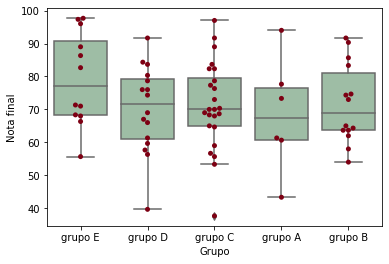

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='Grupo', y='Nota final', data=x_test, color='#99c2a2')
ax = sns.swarmplot(x='Grupo', y='Nota final', data=x_test, color='#7d0013')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Ordinary Least Squares (OLS) model
model = ols('value ~ C(Grupo)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(Grupo),1185.475758,4.0,1.795292,0.12988
Residual,46387.818725,281.0,NaN,NaN


In [ ]:
!pip install bioinfokit


In [ ]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(Grupo)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Grupo),4.0,1185.475758,296.368940,1.795292,0.12988
Residual,281.0,46387.818725,165.081205,NaN,NaN


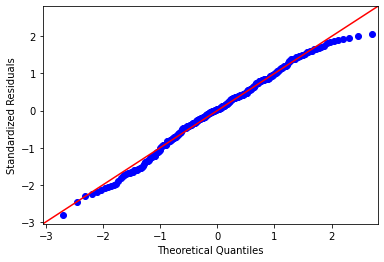

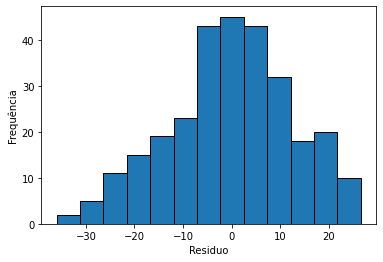

In [ ]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuo")
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Teste de Shapiro-Wilk para resíduos 
stats.shapiro(model.resid)

(0.9887959957122803, 0.02628411538898945)

In [ ]:
# Teste de Bartlett para resíduos 
res = stat()
res.bartlett(df=df_melt, res_var='value', xfac_var='Grupo')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),3.4804
1,Degrees of freedom (Df),4.0000
2,p value,0.4809


# Regressão simples
Objetivo:

Hipóstese:

Preaaupoaições:
* A relação entre as variáveis Xe ydeve ser linear
* Erros (residuais) devem ser independentes uns dos outros
* Erros (residuais) devem ser normalmente distribuídos com uma média de 0
* Erros (residuais) devem ter variância igual (homocedasticidade)

In [ ]:
nota_curso30

In [ ]:
X = nota_curso30['Redação'] # variável independente
y = nota_curso30['Matemática'] # variável dependente 

X = sm.add_constant(X)
model = sm.OLS(y,X)
reg = model.fit()




In [ ]:
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:             Matemática   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     59.49
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           2.11e-08
Time:                        04:14:26   Log-Likelihood:                -106.18
No. Observations:                  30   AIC:                             216.4
Df Residuals:                      28   BIC:                             219.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0588      9.327      0.114      0.9

In [ ]:
 print(reg.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0588      9.327      0.114      0.910     -18.048      20.165


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


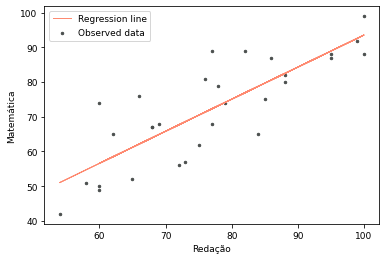

In [ ]:
from bioinfokit import visuz
# get predicted Y and add to original dataframe
nota_curso30['y previsto']=reg.predict(X)
df.head(2)
# create regression plot with defaults
visuz.stat.regplot(df=nota_curso30, x='Redação', y='Matemática', yhat='y previsto', show= True)



In [ ]:
# get residuals and standardized residuals and add to original dataframe
nota_curso30['res']=pd.DataFrame(reg.resid)
nota_curso30['std_res']=reg.get_influence().resid_studentized_internal
nota_curso30.head(2)

,Grupo,Preparatório,Matemática,Redação,Linguagem,Nota final,y previsto,res,std_res
180,grupo C,sim,62,75,68,68.333333,70.455363,-8.455363,-0.997150
403,grupo D,sim,88,100,99,95.666667,93.587563,-5.587563,-0.697995


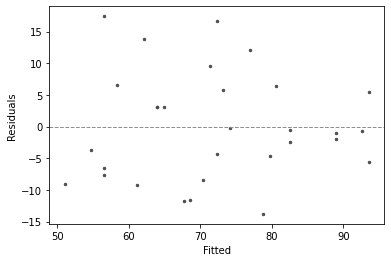

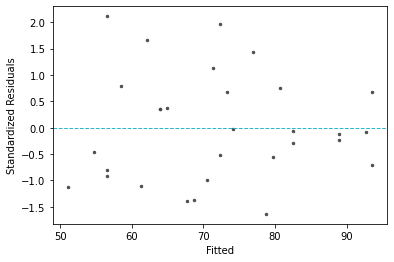

In [ ]:
visuz.stat.reg_resid_plot(df=nota_curso30, yhat='y previsto', resid='res', stdresid='std_res', show= True)

Text(0, 0.5, 'Standardized Residuals')

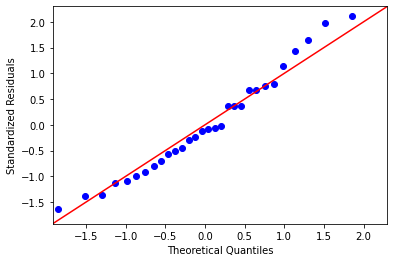

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# create QQ plot
# line=45 option to plot the data around 45 degree line
sm.qqplot(nota_curso30['std_res'], line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
